# Simple RNN, LSTM, GRU, 양방향 LSTM 성능 비교

논문에 나온 실험 여섯개 중에 다섯 번째인 곱셈문제

고려해야할 실수의 범위가 100개이고 그 중에서 마킹된 두 개의 숫자만 곱하는 문제

여기는 신경망을 만들고 신경망 검증 시, 유명한 데이터(iris 같은 것을 사용)

-> 기초적인 문제 제시 -> 이유는 데이터에 대해서 누구나 알 수 있는 것을(데이터 신뢰성 검증 안 해도 되는 것)

-> 검증 안 해도 되므로

도메인의 대표 데이터들이 있다.

## 1. Simple RNN

In [4]:
#LSTM 논문의 6가지 실험 중 다섯번째 곱셈 연산 문제 정의
import tensorflow as tf
import numpy as np

X=[] #독립변수
Y=[] #종속변수

#3000개의 데이터 생성 / 2560개의 학습 및 검증 / 440개의 테스트 데이터
for i in range(3000):
  lst = np.random.rand(100)

  idx = np.random.choice(100,2,replace=False)

  zeros = np.zeros(100)

  #문제 가정
  zeros[idx]=1
  X.append(np.array(list(zip(zeros, lst))))
  Y.append(np.prod(lst[idx]))

#학습 데이터의 첫번째 값
#print(X[0])
print(Y[0])

0.3540706121918213


In [5]:
model = tf.keras.Sequential([
                             tf.keras.layers.SimpleRNN(units=30, return_sequences=True, input_shape=[100,2]),
                             tf.keras.layers.SimpleRNN(units=30),
                             tf.keras.layers.Dense(1)
])

In [6]:
model.compile(optimizer='adam',loss='mse')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 100, 30)           990       
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 30)                1830      
_________________________________________________________________
dense (Dense)                (None, 1)                 31        
Total params: 2,851
Trainable params: 2,851
Non-trainable params: 0
_________________________________________________________________


In [7]:
X=np.array(X)
Y=np.array(Y)
#훈련 시에는 array화
history = model.fit(X[:2560], Y[:2560], epochs=100, validation_split=0.2)

Epoch 1/100
64/64 [==============================] - 4s 41ms/step - loss: 0.0774 - val_loss: 0.0507
Epoch 2/100
64/64 [==============================] - 2s 30ms/step - loss: 0.0454 - val_loss: 0.0507
Epoch 3/100
64/64 [==============================] - 2s 31ms/step - loss: 0.0453 - val_loss: 0.0508
Epoch 4/100
64/64 [==============================] - 2s 31ms/step - loss: 0.0475 - val_loss: 0.0512
Epoch 5/100
64/64 [==============================] - 2s 31ms/step - loss: 0.0464 - val_loss: 0.0527
Epoch 6/100
64/64 [==============================] - 2s 30ms/step - loss: 0.0481 - val_loss: 0.0508
Epoch 7/100
64/64 [==============================] - 2s 31ms/step - loss: 0.0473 - val_loss: 0.0553
Epoch 8/100
64/64 [==============================] - 2s 31ms/step - loss: 0.0515 - val_loss: 0.0507
Epoch 9/100
64/64 [==============================] - 2s 31ms/step - loss: 0.0476 - val_loss: 0.0512
Epoch 10/100
64/64 [==============================] - 2s 30ms/step - loss: 0.0451 - val_loss: 0.0508

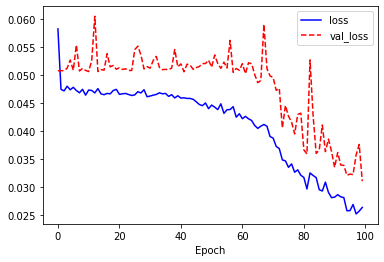

In [8]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], 'b-', label = 'loss')
plt.plot(history.history['val_loss'], 'r--', label = 'val_loss')

plt.xlabel('Epoch')
plt.legend()
plt.show()

In [9]:
prediction = model.predict(X[2560:2560+5])

for i in range(5):
  print(Y[2560+i], '\t', prediction[i][0], '\tdiff:',abs(prediction[i][0] - Y[2560+i]))

0.7255384021192404 	 0.62280524 	diff: 0.1027331643491598
0.1712375082830756 	 0.18282555 	diff: 0.01158804215389797
0.07041481706117368 	 0.19082706 	diff: 0.12041223970438265
0.27086994081067833 	 0.20237869 	diff: 0.068491250567911
0.05753652110000815 	 0.20126961 	diff: 0.1437330906162623


In [10]:
# 논문에서 언급한 실험에서는 오차가 0.04이상인 경우 오답으로 분류!
# 단순 RNN의 경우
prediction = model.predict(X[2560:])
fail=0

for i in range(len(prediction)):
  if abs(prediction[i][0]-Y[2560+i]) > 0.04:
    fail+=1
print("정확도", (440-fail)/440*100,"%")

정확도 14.545454545454545 %


## 2. LSTM

In [11]:
import tensorflow as tf
import numpy as np

X=[] #독립변수
Y=[] #종속변수

#3000개의 데이터 생성 / 2560개의 학습 및 검증 / 440개의 테스트 데이터
for i in range(3000):
  lst = np.random.rand(100)

  idx = np.random.choice(100,2,replace=False)

  zeros = np.zeros(100)

  #문제 가정
  zeros[idx]=1
  X.append(np.array(list(zip(zeros, lst))))
  Y.append(np.prod(lst[idx]))

model = tf.keras.Sequential([
                             tf.keras.layers.LSTM(units=30, return_sequences=True, input_shape=[100,2]),
                             tf.keras.layers.LSTM(units=30),
                             tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam',loss='mse')
X=np.array(X)
Y=np.array(Y)

history = model.fit(X[:2560],Y[:2560],epochs=100, validation_split=0.2)



Epoch 1/100
64/64 [==============================] - 7s 64ms/step - loss: 0.0544 - val_loss: 0.0473
Epoch 2/100
64/64 [==============================] - 3s 53ms/step - loss: 0.0494 - val_loss: 0.0474
Epoch 3/100
64/64 [==============================] - 3s 52ms/step - loss: 0.0476 - val_loss: 0.0475
Epoch 4/100
64/64 [==============================] - 3s 52ms/step - loss: 0.0477 - val_loss: 0.0476
Epoch 5/100
64/64 [==============================] - 3s 53ms/step - loss: 0.0500 - val_loss: 0.0476
Epoch 6/100
64/64 [==============================] - 3s 52ms/step - loss: 0.0501 - val_loss: 0.0476
Epoch 7/100
64/64 [==============================] - 3s 53ms/step - loss: 0.0498 - val_loss: 0.0476
Epoch 8/100
64/64 [==============================] - 4s 56ms/step - loss: 0.0485 - val_loss: 0.0471
Epoch 9/100
64/64 [==============================] - 4s 56ms/step - loss: 0.0495 - val_loss: 0.0480
Epoch 10/100
64/64 [==============================] - 3s 54ms/step - loss: 0.0513 - val_loss: 0.0478

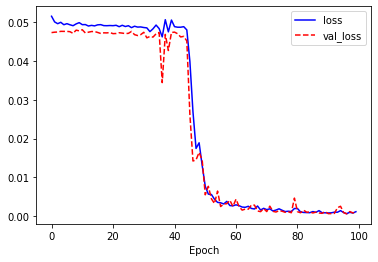

In [12]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], 'b-', label = 'loss')
plt.plot(history.history['val_loss'], 'r--', label = 'val_loss')

plt.xlabel('Epoch')
plt.legend()
plt.show()

In [13]:
#LSTM의 정확도
prediction = model.predict(X[2560:])
fail=0

for i in range(len(prediction)):
  if abs(prediction[i][0]-Y[2560+i]) > 0.04:
    fail+=1
print("정확도", (440-fail)/440*100,"%")

정확도 84.54545454545455 %


# 3. GRU

In [14]:
import tensorflow as tf
import numpy as np

X=[] #독립변수
Y=[] #종속변수

#3000개의 데이터 생성 / 2560개의 학습 및 검증 / 440개의 테스트 데이터
for i in range(3000):
  lst = np.random.rand(100)

  idx = np.random.choice(100,2,replace=False)

  zeros = np.zeros(100)

  #문제 가정
  zeros[idx]=1
  X.append(np.array(list(zip(zeros, lst))))
  Y.append(np.prod(lst[idx]))

model = tf.keras.Sequential([
                             tf.keras.layers.GRU(units=30, return_sequences=True, input_shape=[100,2]),
                             tf.keras.layers.GRU(units=30),
                             tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam',loss='mse')
X=np.array(X)
Y=np.array(Y)

history = model.fit(X[:2560],Y[:2560],epochs=100, validation_split=0.2)



Epoch 1/100
64/64 [==============================] - 6s 59ms/step - loss: 0.0563 - val_loss: 0.0508
Epoch 2/100
64/64 [==============================] - 3s 51ms/step - loss: 0.0467 - val_loss: 0.0496
Epoch 3/100
64/64 [==============================] - 3s 50ms/step - loss: 0.0450 - val_loss: 0.0496
Epoch 4/100
64/64 [==============================] - 3s 51ms/step - loss: 0.0476 - val_loss: 0.0496
Epoch 5/100
64/64 [==============================] - 3s 51ms/step - loss: 0.0485 - val_loss: 0.0489
Epoch 6/100
64/64 [==============================] - 3s 51ms/step - loss: 0.0471 - val_loss: 0.0491
Epoch 7/100
64/64 [==============================] - 3s 52ms/step - loss: 0.0458 - val_loss: 0.0489
Epoch 8/100
64/64 [==============================] - 3s 50ms/step - loss: 0.0479 - val_loss: 0.0491
Epoch 9/100
64/64 [==============================] - 3s 51ms/step - loss: 0.0482 - val_loss: 0.0491
Epoch 10/100
64/64 [==============================] - 3s 50ms/step - loss: 0.0460 - val_loss: 0.0500

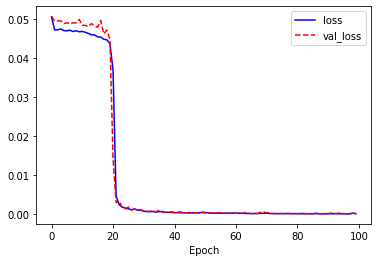

In [15]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], 'b-', label = 'loss')
plt.plot(history.history['val_loss'], 'r--', label = 'val_loss')

plt.xlabel('Epoch')
plt.legend()
plt.show()

In [16]:
#GRU의 정확도
prediction = model.predict(X[2560:])
fail=0

for i in range(len(prediction)):
  if abs(prediction[i][0]-Y[2560+i]) > 0.04:
    fail+=1
print("정확도", (440-fail)/440*100,"%")

정확도 98.86363636363636 %


## 4. 양방향 LSTM

In [17]:
#뒤에 있는 정보 또한 가운데 정보를 예측하는데 도움이 된다.
#뒷부분에 중요한 정보가 있을 수 있다.

#-> 그래서 역방향 lstm도 추가했다.

In [18]:
#Sequential을 선언 후에 add로 추가할 수 있다.
#Bidirectional을 추가하여 양방향을 다룰 수 있다.

In [19]:
import tensorflow as tf
import numpy as np

X=[] #독립변수
Y=[] #종속변수

#3000개의 데이터 생성 / 2560개의 학습 및 검증 / 440개의 테스트 데이터
for i in range(3000):
  lst = np.random.rand(100)

  idx = np.random.choice(100,2,replace=False)

  zeros = np.zeros(100)

  #문제 가정
  zeros[idx]=1
  X.append(np.array(list(zip(zeros, lst))))
  Y.append(np.prod(lst[idx]))

from keras.models import Sequential
from keras.layers import Dense, Activation, Bidirectional, LSTM

model = Sequential()
model.add(Bidirectional(LSTM(30,return_sequences=True),input_shape=[100,2]))
model.add(Bidirectional(LSTM(30)))
model.add(Dense(1)) #1개 예측

model.compile(optimizer='adam',loss='mse')

X=np.array(X)
Y=np.array(Y)

history = model.fit(X[:2560],Y[:2560],epochs=100, validation_split=0.2)



Epoch 1/100
64/64 [==============================] - 12s 110ms/step - loss: 0.0560 - val_loss: 0.0474
Epoch 2/100
64/64 [==============================] - 6s 90ms/step - loss: 0.0486 - val_loss: 0.0475
Epoch 3/100
64/64 [==============================] - 6s 87ms/step - loss: 0.0465 - val_loss: 0.0475
Epoch 4/100
64/64 [==============================] - 5s 86ms/step - loss: 0.0441 - val_loss: 0.0476
Epoch 5/100
64/64 [==============================] - 5s 85ms/step - loss: 0.0457 - val_loss: 0.0473
Epoch 6/100
64/64 [==============================] - 5s 86ms/step - loss: 0.0460 - val_loss: 0.0481
Epoch 7/100
64/64 [==============================] - 6s 87ms/step - loss: 0.0428 - val_loss: 0.0498
Epoch 8/100
64/64 [==============================] - 6s 87ms/step - loss: 0.0484 - val_loss: 0.0473
Epoch 9/100
64/64 [==============================] - 6s 87ms/step - loss: 0.0439 - val_loss: 0.0473
Epoch 10/100
64/64 [==============================] - 6s 87ms/step - loss: 0.0465 - val_loss: 0.04

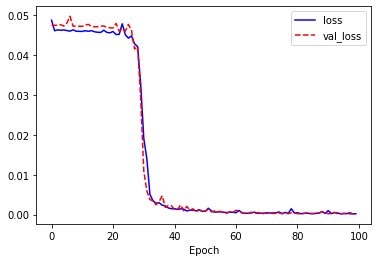

In [20]:
#GRU보다는 성능이 낮다.
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], 'b-', label = 'loss')
plt.plot(history.history['val_loss'], 'r--', label = 'val_loss')

plt.xlabel('Epoch')
plt.legend()
plt.show()

In [21]:
prediction = model.predict(X[2560:])
fail=0

for i in range(len(prediction)):
  if abs(prediction[i][0]-Y[2560+i]) > 0.04:
    fail+=1
print("정확도", (440-fail)/440*100,"%")

정확도 93.86363636363636 %


LSTM이 SimpleRNN보다 확실히 좋음을 알 수 있다.

SimpleRNN<LSTM<GRU -> LSTM가 GRU보다 높거나 비슷해야되는데 여기서는 GRU가 높게 나옴

각 모델 비교시, 실험환경(ex. Colab GPU), 연산 결과, 학습 시간도 측정해야한다!